<a href="https://colab.research.google.com/github/HWMV/Reuters_news_classifier_model/blob/main/Reuter_news_classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reuter_news_classifier_model

뉴스 기사를 다중 분류하는 모델을 만들어 보자
성능을 향상하기 위한 여러 기법을 활용하자

acc : 77% 까지 올렸으나 나중에 최적화 좀 더 진행해보자!

## 1. 데이터 로드 및 전처리

In [1]:
# library import
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [3]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# validation data separation
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                                  test_size=0.25, random_state=2023)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [4]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
  # [[YOUR CODE]
  tokenizer = Tokenizer(num_words=dim)
  data_one_hot = tokenizer.sequences_to_matrix(data, mode='binary')
  return data_one_hot

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]
# Reuters 기사 클래스 46개 위에서 확인
num_classes = 46
y_train = to_categorical(train_labels, num_classes)
y_val = to_categorical(val_labels, num_classes)
y_test = to_categorical(test_labels, num_classes)

## 3. 모델 구성 및 컴파일

In [25]:
# 모델 구성
model = models.Sequential()

model.add(layers.Input(shape=(10000,)))
# Batch Normalization
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
# Dropout
model.add(layers.Dropout(0.5))
# Batch Normalization
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
# Dropout
model.add(layers.Dropout(0.5))
# 출력층, num_classes는 위에서 46으로 지정
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_8 (Bat  (None, 10000)             40000     
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 128)               1280128   
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_9 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)               

In [26]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# 모델 fit & 오버피팅 방지(Earlystopping, checkpoint)
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백 함수를 설정
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss',
                             save_best_only=True, verbose=1)

# EarlyStopping 콜백 함수를 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# 모델 학습
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val), callbacks=[checkpoint, early_stopping])


Epoch 1/30
105/106 [============================>.] - ETA: 0s - loss: 2.4028 - accuracy: 0.4631
Epoch 1: val_loss improved from inf to 1.87574, saving model to best_model.h5
106/106 [==============================] - 6s 38ms/step - loss: 2.4003 - accuracy: 0.4636 - val_loss: 1.8757 - val_accuracy: 0.6768
Epoch 2/30
  3/106 [..............................] - ETA: 3s - loss: 1.5437 - accuracy: 0.6771

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


105/106 [============================>.] - ETA: 0s - loss: 1.4142 - accuracy: 0.6731
Epoch 2: val_loss improved from 1.87574 to 1.34552, saving model to best_model.h5
106/106 [==============================] - 4s 35ms/step - loss: 1.4147 - accuracy: 0.6734 - val_loss: 1.3455 - val_accuracy: 0.7315
Epoch 3/30
106/106 [==============================] - ETA: 0s - loss: 1.1513 - accuracy: 0.7265
Epoch 3: val_loss improved from 1.34552 to 1.10877, saving model to best_model.h5
106/106 [==============================] - 5s 46ms/step - loss: 1.1513 - accuracy: 0.7265 - val_loss: 1.1088 - val_accuracy: 0.7618
Epoch 4/30
105/106 [============================>.] - ETA: 0s - loss: 0.9692 - accuracy: 0.7629
Epoch 4: val_loss improved from 1.10877 to 0.98731, saving model to best_model.h5
106/106 [==============================] - 3s 33ms/step - loss: 0.9693 - accuracy: 0.7629 - val_loss: 0.9873 - val_accuracy: 0.7912
Epoch 5/30
106/106 [==============================] - ETA: 0s - loss: 0.8697 - ac

<ipython-input-28-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


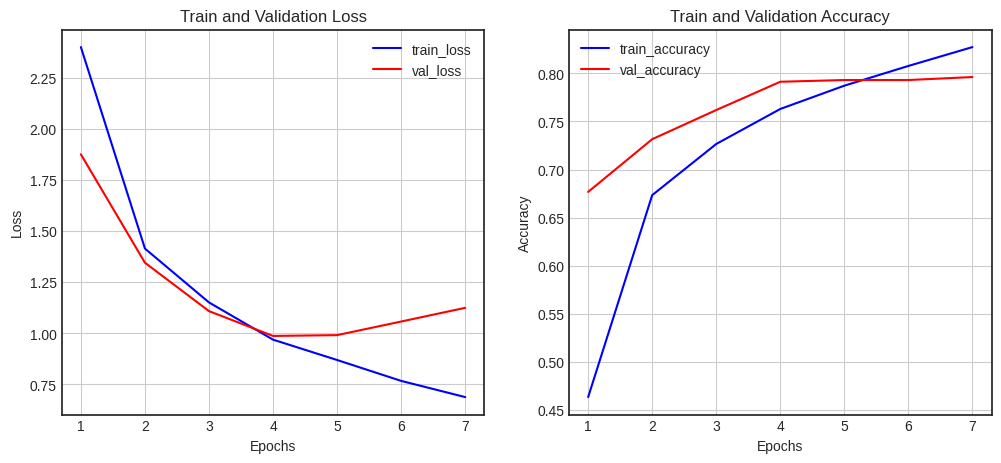

In [28]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 5. 모델 평가 및 예측


In [29]:
# 모델 evaluate
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("테스트 손실:", test_loss)
print("테스트 정확도:", test_accuracy)

71/71 [==============================] - 0s 5ms/step - loss: 1.2177 - accuracy: 0.7743
테스트 손실: 1.2176504135131836
테스트 정확도: 0.7742653489112854
